In [2]:
import torch

In [4]:
from IPython.display import Image, clear_output  # to display images
# from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.1.2+cpu CPU


In [11]:
import os
os.getcwd()

'c:\\Users\\carlo\\Dropbox\\big projects dropbox\\wecloud\\obj count'

GROUND TRUTH TRAINING DATA:


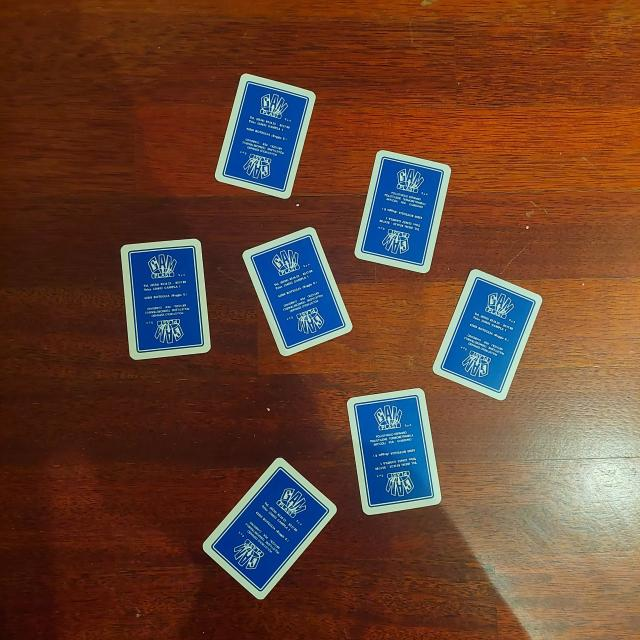

In [7]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename=r"C:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\train\images\1_jpg.rf.672ebd83828095b8ea731fd465b993a2.jpg", width=300)

In [9]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [13]:
%%writetemplate yolov5/models/custom_yolov5s.yaml

# parameters
nc: 3  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [24]:
os.getcwd()

'c:\\Users\\carlo\\Dropbox\\big projects dropbox\\wecloud\\obj count\\yolov5'

In [27]:
# %cd /yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../test/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to 'C:\Users\carlo\Dropbox\big': No such file or directory
YOLOv5  2023-12-28 Python-3.8.18 torch-2.1.2+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7246518 parameters, 0 gradients, 16.7 GFLOPs
image 1/10 C:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\test\images\2_jpg.rf.98fd83918352971a912ef2293057d8e0.jpg: 416x416 9 cards, Done. (0.106s)
image 2/10 C:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\test\images\7_jpg.rf.5dd11f5e93061bc57f734d96ae056e0a.jpg: 416x

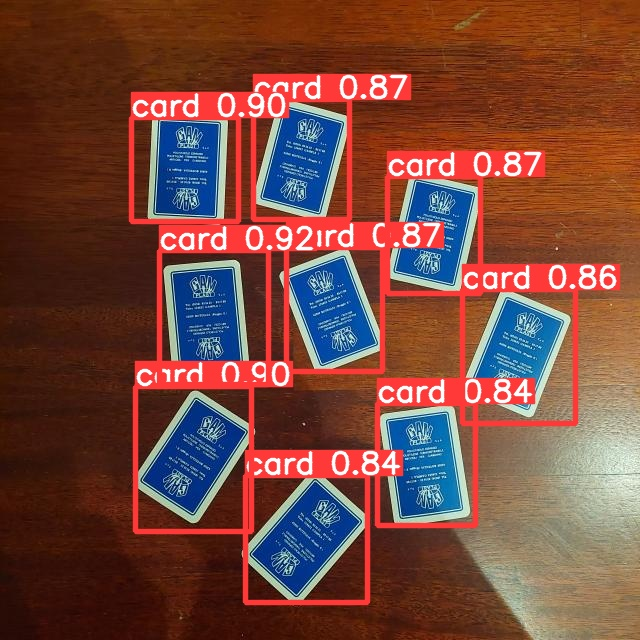

In [26]:
Image(filename=r"C:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\yolov5\runs\detect\exp\2_jpg.rf.98fd83918352971a912ef2293057d8e0.jpg", width=300)

In [35]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images --save-txt

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../test/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to 'C:\Users\carlo\Dropbox\big': No such file or directory
YOLOv5  2023-12-28 Python-3.8.18 torch-2.1.2+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7246518 parameters, 0 gradients, 16.7 GFLOPs
image 1/10 C:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\test\images\2_jpg.rf.98fd83918352971a912ef2293057d8e0.jpg: 416x416 9 cards, Done. (0.108s)
image 2/10 C:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\test\images\7_jpg.rf.5dd11f5e93061bc57f734d96ae056e0a.jpg: 416x4

In [53]:
os.getcwd()

'c:\\Users\\carlo\\Dropbox\\big projects dropbox\\wecloud\\obj count\\yolov5'

In [75]:
os.system("python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../uploads --save-txt --exist-ok")  



0

In [47]:
# tell it where to take the pictures
# tell it where to get the picture with the labels
# tell it to get the numer of cards

In [64]:
import argparse
import os
import sys
from pathlib import Path

import torch
import torch.backends.cudnn as cudnn

FILE = Path('__file__').resolve()
ROOT = FILE.parents[0]  # YOLOv5 root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # relative

In [65]:
FILE.parents[0] 

WindowsPath('.')

In [58]:
print(os.getcwd())
print(sys.argv[0])
print(os.path.dirname(os.path.realpath('__file__')))

c:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\yolov5
c:\Users\carlo\Anaconda3\envs\objdet\lib\site-packages\ipykernel_launcher.py
C:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\yolov5


In [59]:
os.path.dirname(os.path.realpath('__file__'))

'C:\\Users\\carlo\\Dropbox\\big projects dropbox\\wecloud\\obj count\\yolov5'

In [80]:
os.chdir(r"C:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\yolov5\runs\det\exp\labels")

In [81]:
os.getcwd()


'C:\\Users\\carlo\\Dropbox\\big projects dropbox\\wecloud\\obj count\\yolov5\\runs\\det\\exp\\labels'

In [98]:
def count_obj(filename):
    f = open(filename, "r")
    return len(f.readlines())

In [99]:
obc = count_obj('5.txt')

In [2]:
'pic.jpg'.split('.')[-2]+'.txt'

'pic.txt'